# Brian S Caffo
<hr>
Professor<br>
Departments of Biostatistics (primary)<br>
Department of Biomedical Engineering (courtesy)<br>
Johns Hopkins University<br>
bcaffo@gmail.com <br>
[www.bcaffo.com](www.bcaffo.com) <br>
This CV is my attempt at making one that's easier to maintain, suggestions welcome [github](https://github.com/bcaffo/cv) <br>
[Link to live version](https://bcaffo.github.io/cv/cvJupyter.html)

## Summary
Brian Caffo, PhD is a professor in the Department of Biostatistics with a secondary appointment in the Department of Biomedical Engineering at Johns Hopkins University. 
He graduated from the University of Florida Department of Statistics in 2001. He has worked in statistical computing, statistical modeling, computational statistics, multivariate and decomposition methods and statistics in neuroimaging and neuroscience. He led teams that won the ADHD 200 prediction competition. He co-directs the SMART statistical group. With other faculty at JHU, he created and co-directs the Coursera Data Science Specialization, a 10 course specialization on statistical data analysis. He co-directs the JHU Data Science Lab, a group dedicated to open educational innovation and data science. He is the former director of the Biostatistics graduate programs and admissions committees. He is currently the co-director of the Johns Hopkins High Performance Computing Exchange super computing service center and past-president of the Bloomberg School of Public Health faculty senate.

## Education

| Year | Description | Institution | | 
|:---  |:---         | :--- | :--- | 
| 2006 | K25 training grant | NIH | *A mentored training program in imaging science* | 
| 2001 | PhD in statistics | U of Florida | *Candidate sampling schemes and some important applications* | 
| 1998 | MS in statistics|  U of Florida | |
| 1995 | Dual BS in mathematics and statistics | U of Florida | |

## Professional experience
| Year | Title | Place | 
| :--- | :---  | :---  |
|2019 - | Secondary | Dept of Biomedical Engineering, JHU |
|2019 - | Co-director | Johns Hopkins High Performance Computing Exchange (JHPCE)| 
| 2016 - | Faculty member | Kavli Neuroscience Discovery Institute |
| 2017 - | Faculty member | Malone Center for Engineering and Healthcare |
| 2014 - | Co-founding member | Johns Hopkins Data Science Lab |
|2011 - | Founding co-director | SMART research group |
|2013 - | Full professor | Dept of Biostat,JHU |
|2007-2013 | Associate professor | Dept of Biostat,JHU |
|2001-2007 | Assistant professor |Dept of Biostat,JHU |
|1996-1999 | Research assistant for professor Alan Agresti | Department of Stat, UFL | 
|1996, 1999 | Intern /  programmer | the Pediatric Oncology Group Statistical Office |


## Profesional activities
+ Typically two NIH, NSF or EU review panels per year
+ Publications Officer for the Biometrics Section of the American Statistical Association 2005-2006
+ Founding member (2010) and secretary (2010-) for the Statistics in Imaging ASA section
+ Typically oranizing 1 or 2 ENAR or JSM sessions per year
+ 2006-2008 Associate editor Computational Statistics and Data Analysis
+ 2008-2010 Associate editor for the Journal of the American Statistical Association
+ 2009-2012 Associate editor for the Journal of the Royal Statistical Society Series B
+ 2010-2012 Associate editor for Biometrics
+ Senior program committee member for the Fourteenth International Conference on Artificial Intelligence and Statistics
+ Guest associate editor for Frontiers in Neuroscience special issues on Brain Imaging Methods and Explainable Artificial Intelligence in Healthcare and Finance

## Honors and awards
+ 1998, William S. Mendenhall Award
+ 1999, Anderson Scholar/Faculty nominee for the University of  Florida CLAS
+ 2001, University of Florida CLAS Dissertation Fellowship
+ 2001, University of Florida Statistics Faculty Award
+ 2002, Johns Hopkins Faculty Innovation Award
+ 2006, Johns Hopkins Bloomberg School of Public Health AMTRA award
+ 2008, Johns Hopkins Bloomberg School of Public Health Golden Apple teaching award
+ 2011, Leader and organizer of the declared winning entry of the 2011 ADHD200 prediction competition
+ 2011 Presidential Early Career Award for Scientists and Engineers (PECASE, 2010, awarded in 2011); *The highest honor bestowed by the United States government on science and engineering professionals in the early stages of their independent research careers*
+ 2014, Named a Fellow of the American Statistical Association
+ 2015, Special Invited Lecturer, European Meeting of Statisticians


## Publications

Publications reported in Scopus as of 01/04/2021. My total number of Scopus publications is 228. 

In [13]:
import pandas as pd
import plotly.express as px
import numpy as np
import wordcloud as wc
import matplotlib.pyplot as plt
import os
from IPython.display import Image

#import plotly.io as pio
#pio.renderers.default = "notebook+pdf"

dat = pd.read_csv("publications_01042022_2.csv")

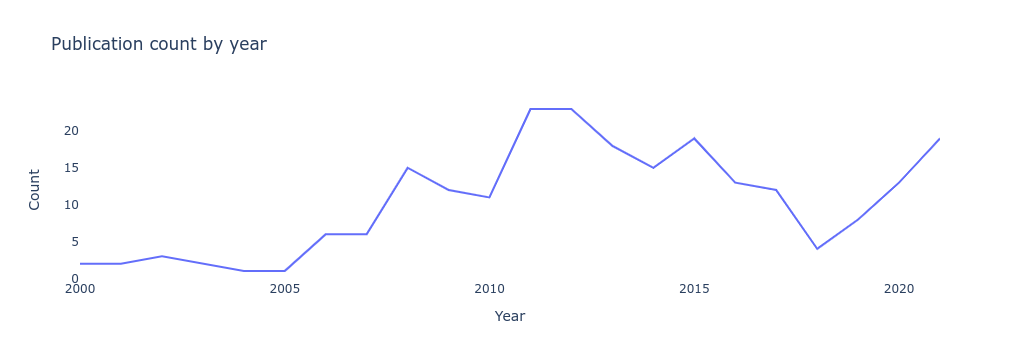

In [40]:
## Convert the data to counts and create a dataframe
temp = dat['Publication Year'].value_counts().reset_index()
temp = temp.rename(columns = {"index" : "Year", "Publication Year" : "Count"}).sort_values("Year")
fit = px.line(temp, x = "Year", y = "Count", title = "Publication count by year")
fit = fit.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})

## Static image
#Image(fit.to_image(format="png", width=400, height=250, scale=2))

## Interactive image
fit.show()

Here are journals I publish in the most (4 or more times). Some of my favorite journals that I have published in less are JRSSA (1), JRSSB (2), JRSSC (1), Biometrika (1), IEEE TMI (1), JCGS (3), AJE (2), Brain (2) and Neuroimage Clinical (2).

In [130]:
temp = dat['Journal Title'].value_counts().reset_index()
temp = temp.rename(columns = {"index" : "Title", "Journal Title" : "Count"}).sort_values("Count", ascending =False)
temp[temp['Count'] > 3]

,Title,Count
0,NeuroImage,16
2,Journal of the American Statistical Association,9
1,Biostatistics,9
3,Human Brain Mapping,7
4,Computational Statistics and Data Analysis,7
5,Annals of Applied Statistics,6
6,PLoS ONE,6
7,Statistics in Medicine,5
8,American Statistician,5
9,Progress in Biomedical Optics and Imaging - Pr...,4


I have published with 625 coauthors. Here is a list of authors that I have had 10 or over manuscripts with.

In [131]:
text = [s.split(',') for s in dat['Authors']]
text = [b.lstrip() for a in text for b in a]
#pd.set_option('display.max_rows', None)
authors = pd.DataFrame({'Author' : text}).value_counts().reset_index()#.sort_values("Author")
authors = authors.rename(columns = {0 : 'Count'})
authors[1 : 16]


,Author,Count
1,Crainiceanu C.,41
2,Pekar J.,28
3,Lindquist M.,23
4,Mostofsky S.,22
5,Hendrix C.,16
6,Punjabi N.M.,16
7,Nebel M.B.,15
8,Reich D.,14
9,Zhao Y.,13
10,Schwartz B.,11


In [210]:
text = dat['Document Title'].to_list()
titles = " ".join(text)
titles = titles.replace("Using", "")
titles = titles.replace("using", "")
titles = titles.replace("Based", "")
titles = titles.replace("based", "")
titles = titles.replace("BASED", "")

titleFile = open("titleFile.txt", "w")
titleFile.write(titles)
titleFile.close()


import stylecloud as sc
sc.gen_stylecloud(file_path = 'titleFile.txt', 
                  icon_name = 'fas fa-brain',
                  stopwords = True)

os.rename('stylecloud.png', 'titles.png')

Here's a wordcloud of words in the titles (excluding common use words, in the shape of an axial brain slice).

<img src= 'titles.png' alt="Wordcloud" style="height: 300px; width:300px;"/>

Here's the citation counts of manuscripts plotted by year of publication.

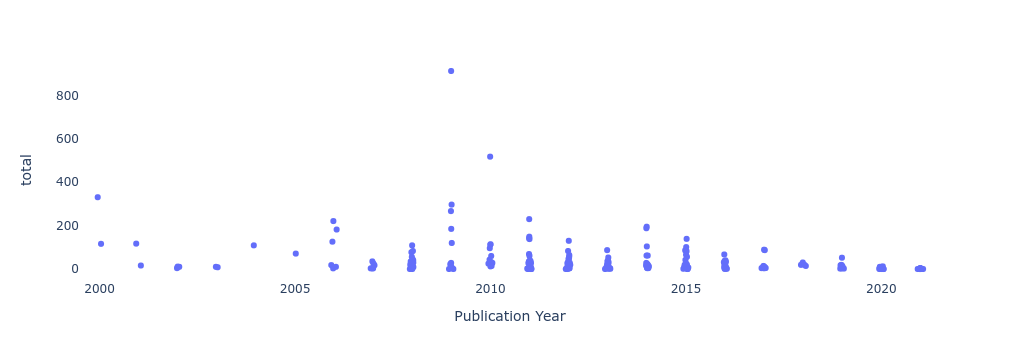

In [41]:
fig = px.strip(dat, x = 'Publication Year', 
                 y = 'total', 
                 hover_data = ['Publication Year', 'total', 'Document Title', 'Journal Title'])
fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})

## Static image
#Image(fig.to_image(format="png", width=400, height=250, scale=2))

## Interactive image
fig.show()

## Part II
### Advisees
+ 2005 PhD Leena Choi, Johns Hopkins Biostatistics, *Modelling biomedical data and the foundations of bioequivalence*
+ 2006 ScM Lijuan Deng, Johns Hopkins Biostatistics, *Spline-based curve fitting with applications to kinetic imaging*
+ 2006 MS Bruce Swihart, University of Colorado Biostatistics, *Quantitative characterization of sleep architecture using multi- state and log-linear models* (jointly
  advised with Naresh Punjabi and Gary Grunwald)
+ 2007 MPH Jeong Yun, Johns Hopkins Bloomberg School of Public Health, *Incidence of hypertension in high risk groups of the Sleep Heart Health Study*
+ 2008 PhD  Xianbin Li, Johns Hopkins Biostatistics, *Modeling composite outcomes and their component parts*
+ 2008 PhD Shu-Chih Su, Johns Hopkins Biostatistics, *Structure/function relationships in the analysis of anatomical and functional neuroimaging data*
+ 2010 ScM John Muschelli, Johns Hopkins Biostatistics, *An iterative approach to hemodynamic response function temporal derivatives in statistical parametric mapping for functional neuroimaging* 
+ 2011 PhD Haley Hedlin, Johns Hopkins Biostatistics, *Statistical methods for inter-subject analysis of neuroscience data*
+ 2011 PhD Bruce Swihart, Johns Hopkins Biostatistics, *From individuals to populations: application and insights concerning the generalized linear mixed model*
+ 2012 PhD Jeff Goldsmith (co-advised with primary advisor Ciprian Crainiceanu), *Cross-Sectional and longitudinal penalized functional regression*
+ 2012 MPH Tiziano Marovino, *The concurrent validity of musculo-skeletal ultrasound imaging in comparison to MRI for detecting rotator cuff tears in the shoulder when performed in a physical therapy setting*
+ 2013 ScM Rawan Al-Lozi, *An evaluation of statistical modeling methods for predicting recovery time from post-traumatic amnesia following moderate or severe traumatic brain injury in children*
+ 2013 PhD Shanshan Li (co-advised with primary advisor Mei-Cheng Wang) *Statistical Methods for Evaluating Diagnostic Accuracy of Biomarkers*
+ 2013 MHS Xiaoqiang Xu, *Parallel Voxel Level Anything*
+ 2015 PhD Juemin Yang *Statistical Methods for Brain Imaging and Genomic Data Analysis*
+ 2015 PhD Shaojie Chen *Statistical Methods to Analyze Massive High-Dimensional Neuroimaging Data*
+ 2015 PhD Fang Han (Co-advised with Han Liu) *Large-scale nonparametric and semiparametric inference for large complex and noisy datasets*
+ 2016 PhD Chen Yue (co-advised with Vadim Zipunnikov) *Generalizations, extensions and applications for principal component analysis*
+ 2016 PhD Amanda Mejia (co-advised with primary advisor Martin Lindquist) *Statistical Methods for Functional Magnetic Resonance Imaging Data*
+ 2016 PhD Aaron Fisher *Methods for High Dimensional Analysis, Multiple Testing, and Visual Exploration*
+ 2016 PhD Huitong Qiu *Statistical Methods and Theory for  Analyzing High Dimensional Time Series*
+ 2020 PhD Zeyi Wang *Statistical Analysis of Functional Connectivity in Brain Imaging: Measurement Reliability and Clinical Applications*
+ 2020 MSE Luchao Qi *Associations between Body Mass Index (BMI) and Physical Activity: National Health and Nutritional Examination Survey (NHANES) 2005-2006*
+ 2021 PhD Bingkai Wang (co-advised with primary advisor Michael Rosenblum) *Statistical Methods for Analyzing Randomized Trials and Brain Imaging Data*

### Post doctoral advisees
+ 2009-2012 Vadim Zipunnikov (co-advising with primary advisor Ciprian Crainiceanu)
+ 2010-2013 Ani Eloyan (co-advising with Ciprian Crainiceanu)
+ 2011-2013 Seonjoo Lee (co-advising with primary advisor Dzung Pham)
+ 2017-2020 Yi Zhao (co-advising with Stewart Mostofsky and Martin Lindquist)
+ 2017-2020 Heather Shappell (co-advising with Jim Pekar and primary advisor Martin Lindquist)

### Advisees in progress
+ Huan Chen
+ Bohao Tang
+ Eric Bridgeford (primary advisor Joshua Vogelstein)

### Student exam participation

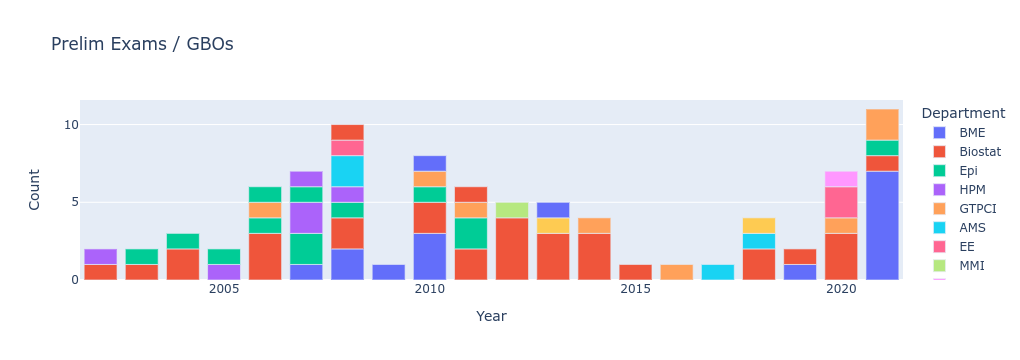

In [43]:
exams = pd.read_csv("exams.csv")
exams['Exam'] = exams['Exam'].str.strip()
exams['Department'] = exams['Department'].str.strip()
exams = exams[ ['Year', 'Department', 'Exam'] ].value_counts().reset_index()
exams = exams.rename(columns = {0 : 'Count'})

fig = px.bar(exams[ exams['Exam'] == "prelim"], x = "Year", y = "Count", color = "Department", title = "Prelim Exams / GBOs")


## Static image
#Image(fig.to_image(format="png", width=600, height=300, scale=2))

## Interactive
fig.show()



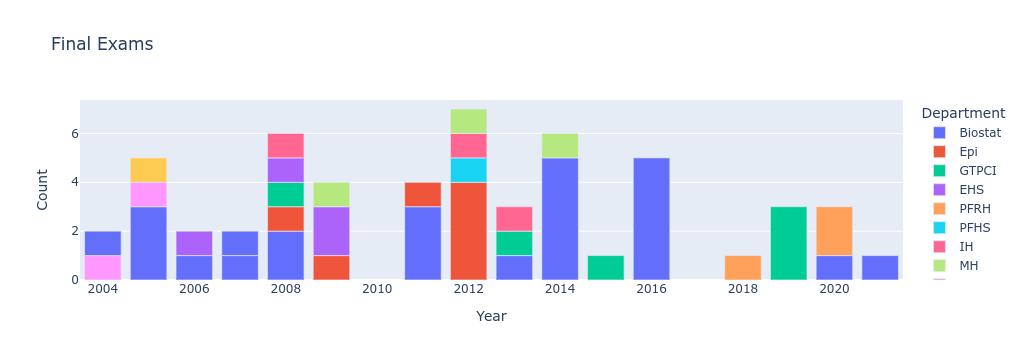

In [44]:
fig = px.bar(exams[ exams['Exam'] == "final"], x = "Year", y = "Count", color = "Department", title = "Final Exams")

## Static
#Image(fig.to_image(format="png", width=600, height=300, scale=2))

## Interactive
fig.show()


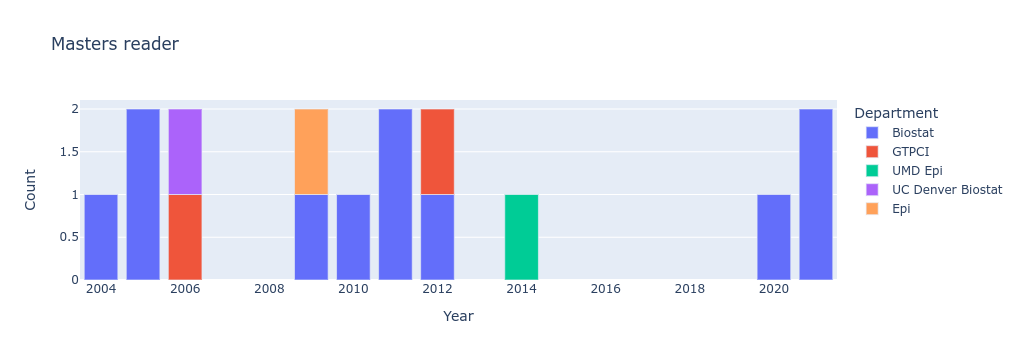

In [45]:
fig = px.bar(exams[ exams['Exam'] == "masters"], x = "Year", y = "Count", color = "Department", title = "Masters reader")

## Static
#Image(fig.to_image(format="png", width=600, height=300, scale=2))

## Interactive
fig.show()



### Classroom Instruction 
#### JHU
+ 2001-2005 Primary instructor, Advanced Statistical Computing 
+ 2003-2004 Primary instructor, Advanced Methods in Biostatistics IV
+ 2003-2004 Guest lecturer, Advanced Methods in Biostatistics II
+ 2003-2008 Guest lecturer, Computing orientation and student computing club 
+ 2003-2004 2008 primary instructor, Statistical Computing
+ 2004-2005 Primary instructor, Advanced Methods in Biostatistics III 
+ 2005-2010 Primary instructor, Methods in Biostatistics  I 
+ 2005-2010 Primary instructor, Methods in Biostatistics II
+ 2008  Primary instructor, Medical Imaging Statistics, Biostatistics PhD and ScM elective 
+ 2010-2017 Guest lecturer, Public Health Perspectives Biostatistics Module
+ 2011-2014 Primary instructor, Advanced Methods in Biostatistics I and II
+ 2013 Guest instructor, ICTR training program
+ 2015-2018 Primary instructor, Advanced Linear Models I and II
+ 2019-2021 Primary instructor, Introduction to Data Science for Biomedical Engineering

#### Short courses
+ 2011 ENAR Statistical methods for new high throughput technological measurements; with Ciprian Crainiceanu
+ 2015 Data Science Hackathon Co-organizer with Leah Jager, Jeff Leek and Roger Peng. Funded by the NIH
+ 2017-2019 quarterly MRICloud and R Johns Hopkins tutorial series

#### Open Education
##### Coursera
+ Mathematical Biostatistics Boot Camp - 7 week course 
+ Mathematical Biostatistics Boot Camp 2 - 7 week courses 
+ Advanced Linear Models for Data Science 1: Least Squares
+ Advanced Linear Models for Data Science 2: Statistical Linear Models
+ Data Science Specialization (with Roger Peng and Jeff Leek); 9 one month classes run monthly plus a  capstone project class; primary instructor for:
    + Statistical Inference
    + Regression Models
    + Developing Data Products
+ Executive Data Science Specialization (with Roger Peng and Jeff Leek); 4 one month classes plus a capstone project
+ PI (roll of executive producer, non-instructor) for the BD2K R25 Genomic Data Science Specialization, fMRI 1 and 2 (Lindquist / Wager), Neurohacking in R (Craininceanu, Sweeney, Muschelli), Neuroscience for Neuroimaging (Baker)

##### E-books
+ Statistical Inference
+ Regression Models
+ Developing Data Products
+ Advanced Linear Models for Data Science
+ Methods in Biostatistics with R (with John Muschelli and Ciprian Crainiceanu)
+ Executive Data Science (with Roger Peng and Jeff Leek)

##### Other
+ swirl: Mentored project by Nick Carchedi intiated during his internship
+ Course notes for Biostatistics 140.651-2 listed on the Johns Hopkins Open Courseware project 

### Research support, PI grants

+ 8/27/12 - 8/26/14 Johns Hopkins Brain Science Institute *The Center for Quantitative Neuroscience: a core for population neuroanalytics and translational systems neuroscience* as part of the RFA *Traumatic brain injury: mechanisms and treatment*
+ 09/30/2010-8/31/2014 NIH NIBIB R01 EB012547 *Statistical methods for hierarchical large n large p problems* 
+ 05/01/06-04/30/09 NIH NIBIB K25 EB003491 *A mentored training program in imaging science* 
+ 12/01/14-11/30/17 NIH R25EB020378 *Big Data Education for the Masses: MOOCs, Modules and Intelligent Tutoring Systems*
+ 09/01/11- 08/31/16 NIH NIBIB P41 EB015909 *Resource for quantitative functional MRI* R01 component of a P41 grant. R01 PIs Caffo/Pekar, P41 PI Van Zijl.
+ 3/14/2012-3/14/2014 Amazon AWS Research Grant for Cloud Development of Neuroimaging Software.
+ 8/16/2019 NVIDIA hardware grant

### Co-investigator awards
Please contact [the JHU Department of Biostat](https://publichealth.jhu.edu/departments/biostatistics) for CO-I information

### JHU major academic service 
+ JHPCE Co-director 2019-
+ Malone Center director search committee 2021/2022 
+ JHSPH Faculty senate president-elect 2019-2020
+ JHSPH Honors and Awards committee 2017-2019
+ JHSPH Faculty Innovation Fund grant referee 2017 - 2018
+ BME faculty hiring committee 2016
+ Biostat faculty hiring committee 2016
+ Malone Center Steering Committee 2016 -
+ Biostatistics admissions committee member 2002 - 2009, 2010 -
+ Biostatistics co-director of the graduate program 2010 - 2012
+ Biostatistics director of the graduate program 2012 - 2016
+ Biostatistics information technology committee member 2001 - 2009 
+ Biostatistics seminar coordinator 2001 - 2002 
+ Co-director Biostatistics/Epidemiology MPH concentration 2008 - 2010
+ Co-organizer Junior Faculty Meetings 2003 
+ CEDC (originally Committee on Affirmative Action) member 2007 - 2010
+ Faculty Senate representative 2002 - 2004 
+ MPH Admissions Committee member 2009 - 2011
+ MPH Executive Board member 2009 -  2011

### Seminars
Here's a plot of the invited seminars I've logged. The list with presentation files can be found 
[here](https://docs.google.com/spreadsheets/d/1mRC6xxZmNj3DnwwvCh_8GpErwhvJNq9gkRB3mQz1JIg/edit?usp=sharing).

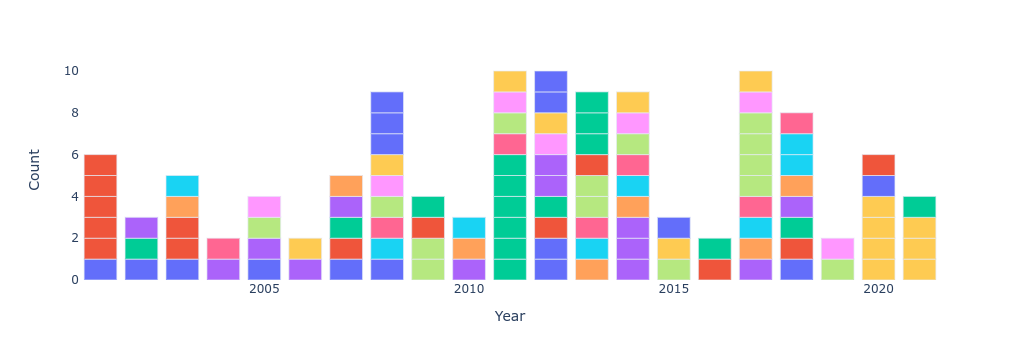

In [57]:
seminars = pd.read_csv("https://docs.google.com/spreadsheets/d/1mRC6xxZmNj3DnwwvCh_8GpErwhvJNq9gkRB3mQz1JIg/export?format=csv&gid=0")
seminars = seminars.assign(Count = 1)
#seminarYear = seminars['Year'].value_counts().reset_index()
#seminarYear = seminarYear.rename(columns = {"index" : "Year", "Year" : "Count"}).sort_values("Year", ascending =False)
#fig = px.bar(seminarYear, x = "Year", y = "Count")
fig = px.bar(seminars, x = "Year", y = "Count", color = "Talk")
fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})

fig.update_layout(showlegend=False)

## Static
#Image(fig.to_image(format="png", width=400, height=200, scale=2))

## Interactive
fig.show()


Here's wordclouds of seminar titles and seminar places.

In [211]:
text = seminars['Talk'].to_list()
titles = " ".join(text)
#titles = titles.replace("Using", "")

titleFile = open("seminarTitleFile.txt", "w")
titleFile.write(titles)
titleFile.close()


import stylecloud as sc
sc.gen_stylecloud(file_path = 'seminarTitleFile.txt', 
                  icon_name = 'fas fa-brain',
                  stopwords = True)

os.rename('stylecloud.png', 'seminarTitles.png')

In [232]:
text = seminars['Where']
text = text[~text.isna()].to_list()
titles = " ".join(text)
titles = titles.replace("Talk", "")
titles = titles.replace("Given", "")
titles = titles.replace("talk", "")
titles = titles.replace("given", "")
titles = titles.replace("Research", "")
titles = titles.replace("research", "")

titleFile = open("seminarWhereFile.txt", "w")
titleFile.write(titles)
titleFile.close()


import stylecloud as sc
sc.gen_stylecloud(file_path = 'seminarWhereFile.txt', 
                  icon_name = 'fas fa-brain',
                  stopwords = True)

os.rename('stylecloud.png', 'seminarWhere.png')

<img src="seminarTitles.png" alt="Wordcloud" style="height: 300px; width:300px;"/> <img src="seminarWhere.png" alt="Wordcloud" style="height: 300px; width:300px;"/>

## CV todo
+ Improve on the style
+ Improve on pdf output
+ Add new P41 and R grants